# This notebook extracts subsets from the discovery set based on cell type and visualize the same gene expression and scores
- Subsets: 
    + ASC (adenoma specific cell)
    + SSC (serrated specific cell)
    + GOB (goblet cell)

In [1]:
import scanpy as sc
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sn 
import sys
import os

In [2]:
import calculation_function as calc

In [3]:
sc.set_figure_params(figsize=[5,5])

## Load data

In [4]:
csnks = pd.Series( ['CSNK1A1',  'CSNK1D', 'CSNK1E', 'CSNK1G2',
        'CSNK1G3', 'CSNK2A1','CSNK2A2' ,'CSNK2B'] )

In [5]:
#path storing the dataset
data_path = "/home/lucy/disc_vali_full_dataset/"

disc = sc.read( os.path.join(data_path, "VUMC_HTAN_DIS_EPI_V2.h5ad") )

In [6]:
disc

AnnData object with n_obs × n_vars = 65088 × 35272
    obs: 'HTAN Parent Data File ID', 'HTAN Specimen ID', 'Cell_Type', 'Polyp_Type', 'Sample_Classification'
    obsm: 'X_pca', 'X_umap'

In [7]:
disc.raw = disc #save the raw count 

In [8]:
header = sc.read("./disc_header.h5ad")
header

AnnData object with n_obs × n_vars = 65088 × 35272
    obs: 'HTAN Parent Data File ID', 'HTAN Specimen ID', 'Cell_Type', 'Polyp_Type', 'Sample_Classification', 'Patient', 'KRAS_mutation', 'all_targets', 'miR-10-5p', 'miR-135ab-5p', 'miR-218-5p', 'miR-190-5p', 'miR-193-3p', 'miR-33-5p', 'miR-182-5p', 'miR-362-5p', 'miR-23-3p', 'miR-18-5p', 'miR-18-3p/7069-3p', 'miR-194-2-3p/6926-5p/7055-5p', 'miR-130-3p/301-3p', 'miR-103-3p/107-3p', 'miR-205-5p', 'miR-183-3p', 'miR-7-5p', 'miR-423-3p', 'miR-501-5p', 'miR-185-5p', 'miR-423-5p', 'miR-26-5p', 'miR-147-3p', 'miR-484', 'miR-378-3p', 'miR-22-3p', 'miR-652-3p', 'miR-374b-5p', 'miR-210-3p', 'miR-194-5p', 'miR-192-5p/215-5p', 'miR-196-5p', 'miR-324-3p', 'miR-27-3p', 'miR-141-3p', 'miR-1198-5p', 'miR-19-3p', 'miR-183-5p', 'let-7-5p/miR-98-5p', 'miR-200-3p/429-3p', 'miR-3081-3p', 'miR-125ab-5p/351-5p', 'miR-28-3p', 'miR-181-5p', 'miR-151-3p', 'miR-24-3p', 'miR-96-5p', 'miR-186-5p', 'miR-425-5p/489-3p', 'miR-17-5p/20-5p/93-5p/106-5p', 'miR-21ac-5p'

In [9]:
header.X = disc.X
header.raw = header

### Extract subsets

In [10]:
gob = header[header.obs["Cell_Type"] == 'GOB']

In [11]:
gob

View of AnnData object with n_obs × n_vars = 10829 × 35272
    obs: 'HTAN Parent Data File ID', 'HTAN Specimen ID', 'Cell_Type', 'Polyp_Type', 'Sample_Classification', 'Patient', 'KRAS_mutation', 'all_targets', 'miR-10-5p', 'miR-135ab-5p', 'miR-218-5p', 'miR-190-5p', 'miR-193-3p', 'miR-33-5p', 'miR-182-5p', 'miR-362-5p', 'miR-23-3p', 'miR-18-5p', 'miR-18-3p/7069-3p', 'miR-194-2-3p/6926-5p/7055-5p', 'miR-130-3p/301-3p', 'miR-103-3p/107-3p', 'miR-205-5p', 'miR-183-3p', 'miR-7-5p', 'miR-423-3p', 'miR-501-5p', 'miR-185-5p', 'miR-423-5p', 'miR-26-5p', 'miR-147-3p', 'miR-484', 'miR-378-3p', 'miR-22-3p', 'miR-652-3p', 'miR-374b-5p', 'miR-210-3p', 'miR-194-5p', 'miR-192-5p/215-5p', 'miR-196-5p', 'miR-324-3p', 'miR-27-3p', 'miR-141-3p', 'miR-1198-5p', 'miR-19-3p', 'miR-183-5p', 'let-7-5p/miR-98-5p', 'miR-200-3p/429-3p', 'miR-3081-3p', 'miR-125ab-5p/351-5p', 'miR-28-3p', 'miR-181-5p', 'miR-151-3p', 'miR-24-3p', 'miR-96-5p', 'miR-186-5p', 'miR-425-5p/489-3p', 'miR-17-5p/20-5p/93-5p/106-5p', 'miR-

In [12]:
asc = header[header.obs["Cell_Type"] == 'ASC']
#asc

In [13]:
ssc = header[header.obs["Cell_Type"] == 'SSC']

## ASC analysis

In [14]:
asc.raw = asc
calc.normalization(asc)

AnnData object with n_obs × n_vars = 7594 × 35272
    obs: 'HTAN Parent Data File ID', 'HTAN Specimen ID', 'Cell_Type', 'Polyp_Type', 'Sample_Classification', 'Patient', 'KRAS_mutation', 'all_targets', 'miR-10-5p', 'miR-135ab-5p', 'miR-218-5p', 'miR-190-5p', 'miR-193-3p', 'miR-33-5p', 'miR-182-5p', 'miR-362-5p', 'miR-23-3p', 'miR-18-5p', 'miR-18-3p/7069-3p', 'miR-194-2-3p/6926-5p/7055-5p', 'miR-130-3p/301-3p', 'miR-103-3p/107-3p', 'miR-205-5p', 'miR-183-3p', 'miR-7-5p', 'miR-423-3p', 'miR-501-5p', 'miR-185-5p', 'miR-423-5p', 'miR-26-5p', 'miR-147-3p', 'miR-484', 'miR-378-3p', 'miR-22-3p', 'miR-652-3p', 'miR-374b-5p', 'miR-210-3p', 'miR-194-5p', 'miR-192-5p/215-5p', 'miR-196-5p', 'miR-324-3p', 'miR-27-3p', 'miR-141-3p', 'miR-1198-5p', 'miR-19-3p', 'miR-183-5p', 'let-7-5p/miR-98-5p', 'miR-200-3p/429-3p', 'miR-3081-3p', 'miR-125ab-5p/351-5p', 'miR-28-3p', 'miR-181-5p', 'miR-151-3p', 'miR-24-3p', 'miR-96-5p', 'miR-186-5p', 'miR-425-5p/489-3p', 'miR-17-5p/20-5p/93-5p/106-5p', 'miR-21ac-5p',

#### subset the dataset for better visualization

<AxesSubplot:ylabel='Count'>

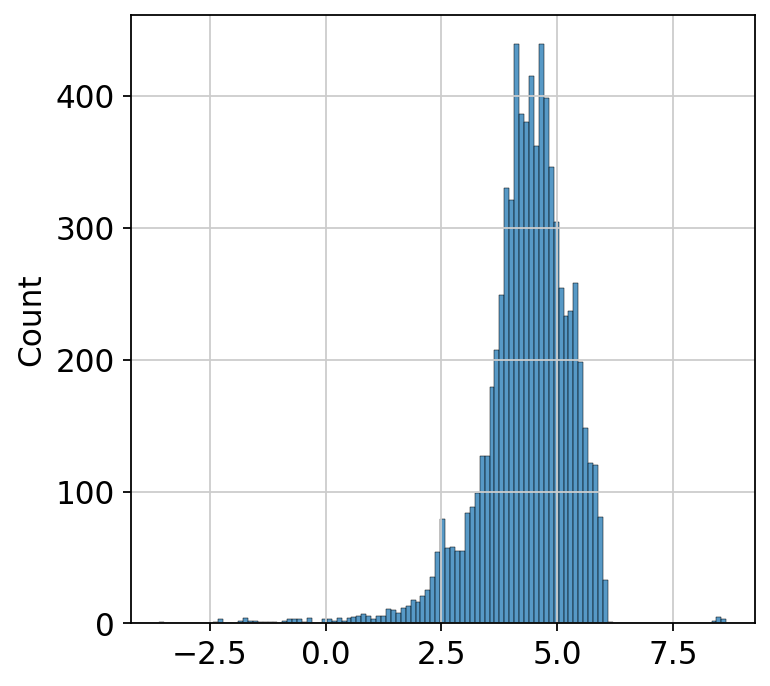

In [15]:
sn.histplot( asc.obsm["X_umap"][:,0] ) # select first col between 1.25 and 6.25

<AxesSubplot:ylabel='Count'>

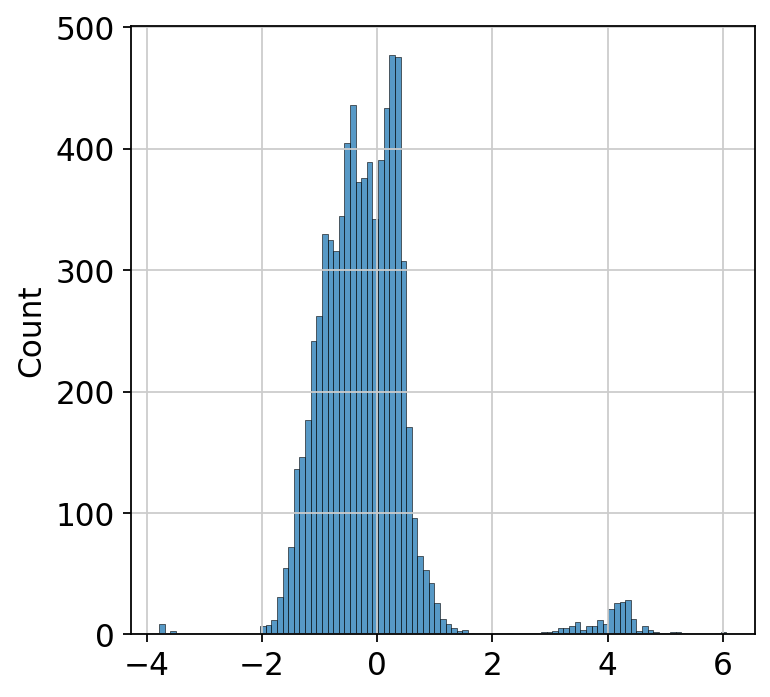

In [16]:
sn.histplot( asc.obsm["X_umap"][:,1] ) # select second col between -2 and 2

In [17]:
asc2 = asc[ asc.obsm["X_umap"][:,0] >1.25]

In [18]:
asc2 = asc2[ asc2.obsm["X_umap"][:,0] <6.25 ]

asc2 = asc2[ asc2.obsm["X_umap"][:,1] >-2 ]
asc2 = asc2[ asc2.obsm["X_umap"][:,1] <2 ]

#### CSNK gene expression UMAP overlay

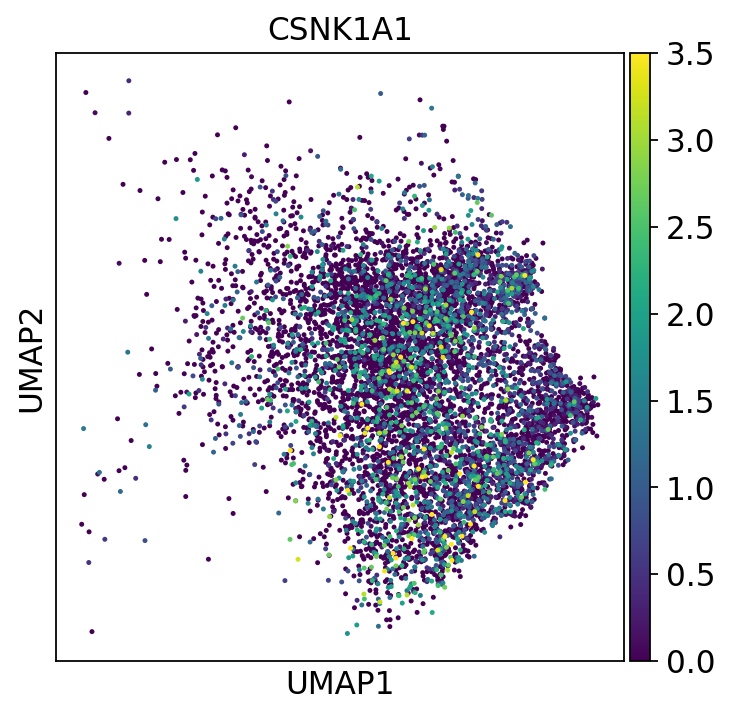

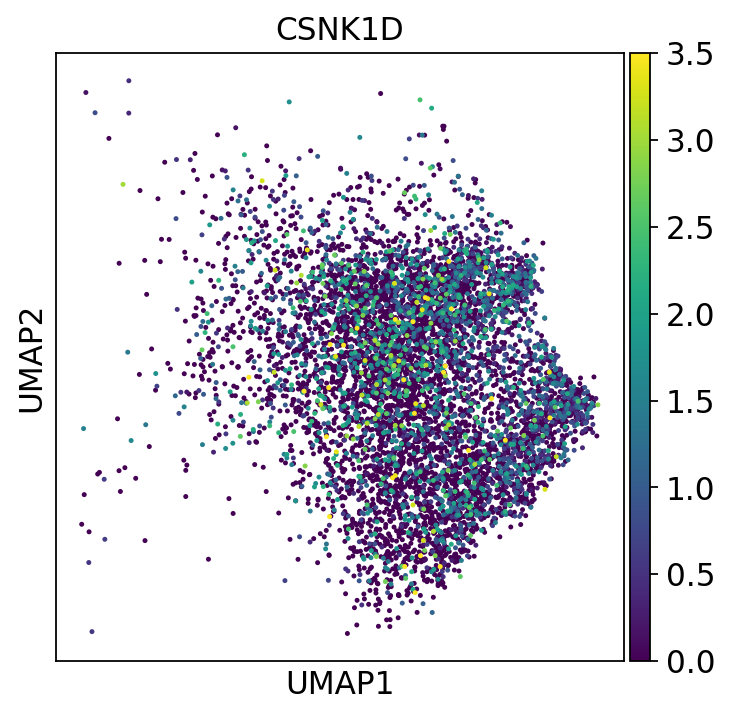

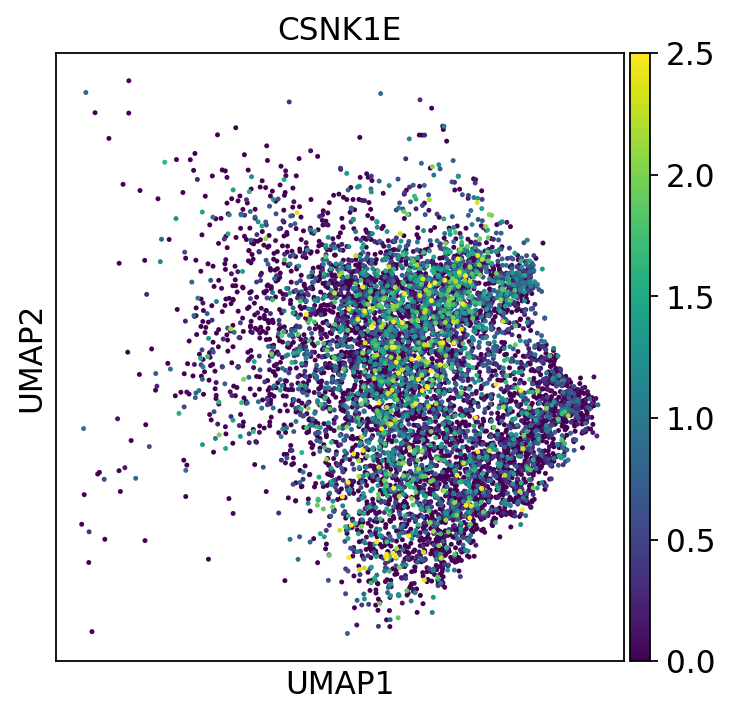

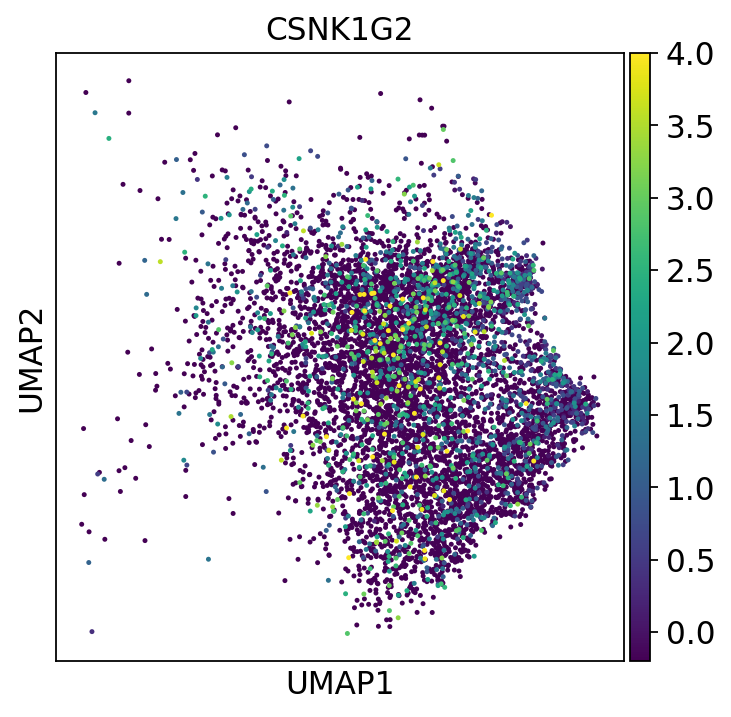

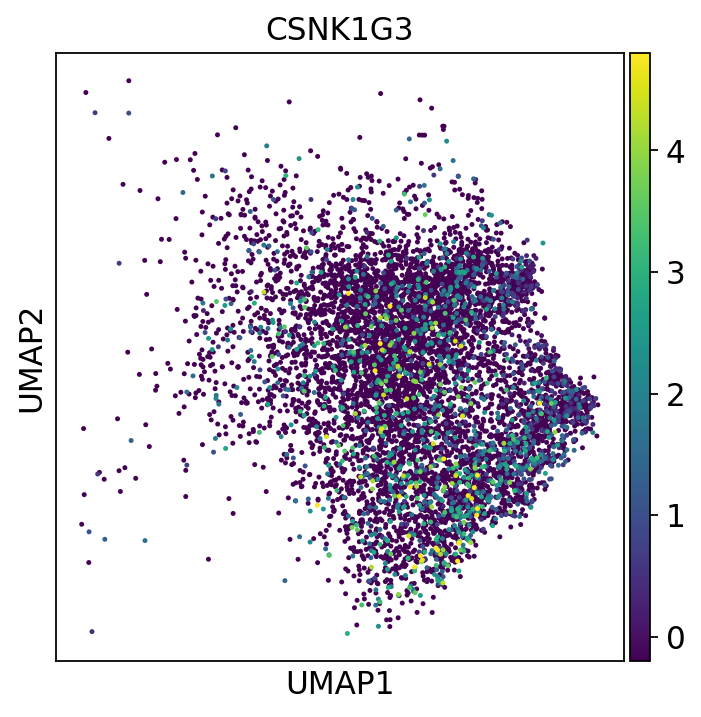

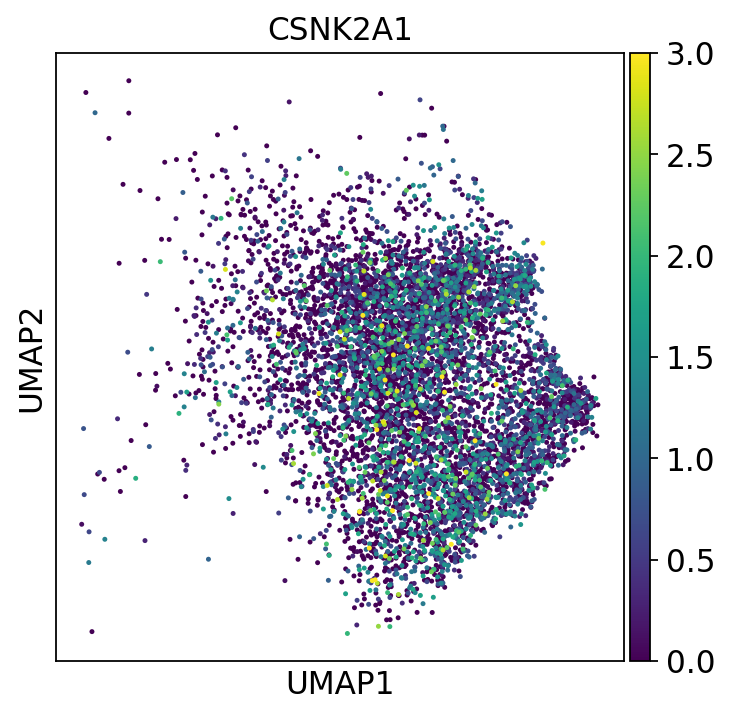

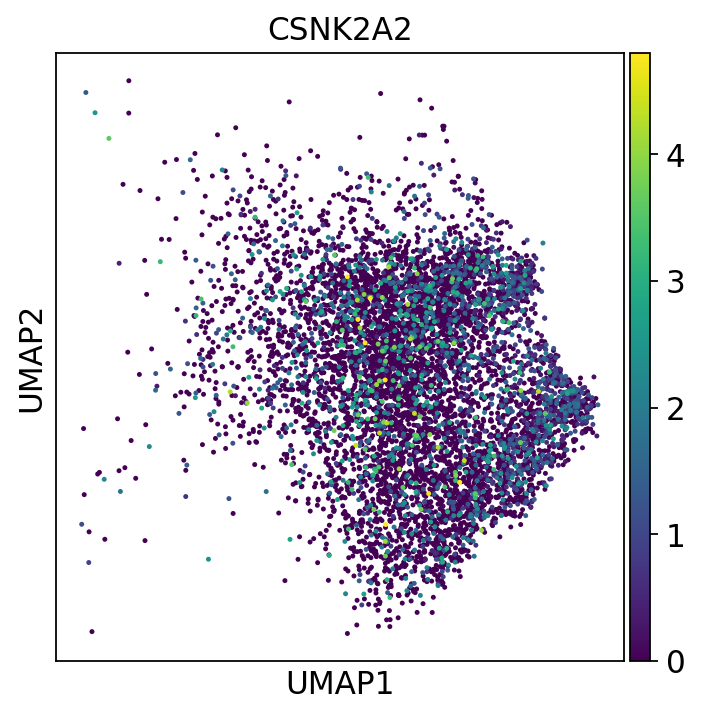

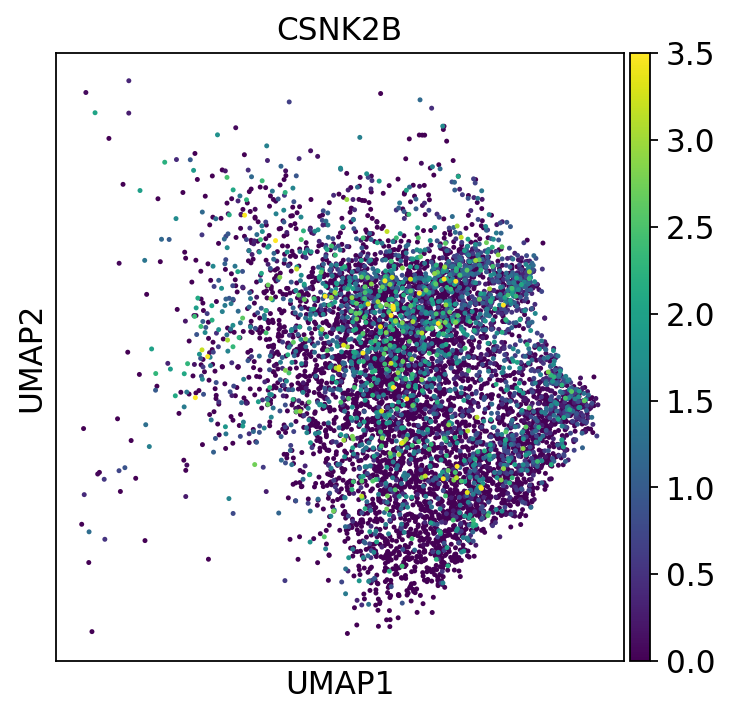

In [19]:
#adjust scale of umaps
#numbers are manually set

#      1.     2.    3.  4.     5    6.   7.    8
vmx = [3.5,  3.5,   2.5,  4,     4.8,   3,   4.8,    3.5]
vmn = [ 0 , 0 ,  0,  -0.2,  -0.2,   0,   0,  0]
sc.set_figure_params(figsize = [5,5], format = 'pdf')

#plot umaps for all CSNK genes for the ASC subset
for i in range(len(csnks)):

    sc.pl.umap(asc2, color = csnks[i] , use_raw= False ,
               vmax = vmx[i], vmin = vmn[i],s =20,  
               )
#save = "ASC_" + csnks[i]

#### all miRNA target gene score UMAP overlay

In [ ]:
sc.pl.umap(asc2, color = [  'all_targets'], title = ["miRNA Target Gene Score"], 
            use_raw= False, vmax = 0.3, vmin = -0.02 , s =20, ) 
#save = "_asc_all_target"

#### KRAS multi-hit UMAP overlay

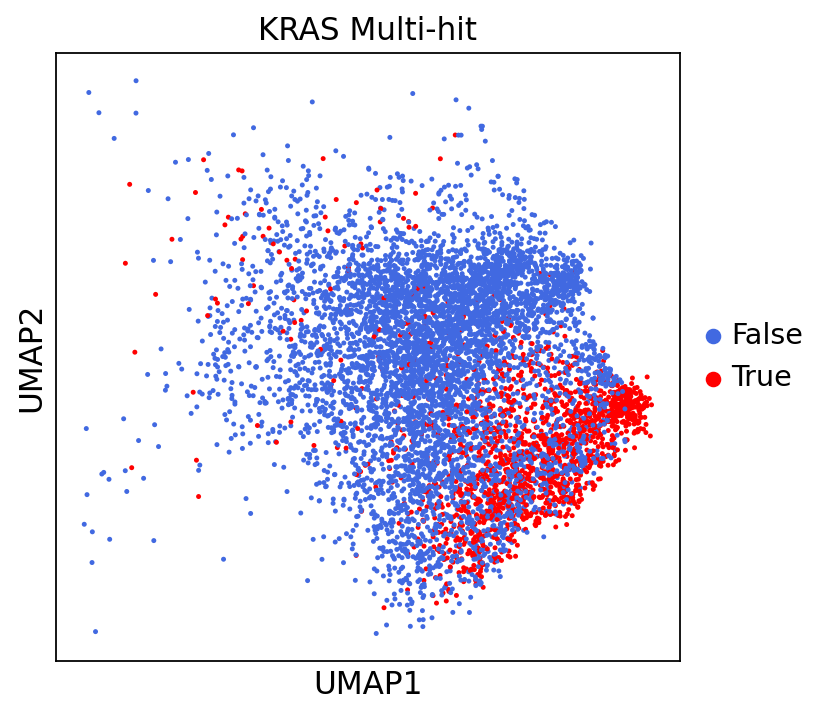

In [13]:
sc.pl.umap(asc2, color = "KRAS Multi-hit", s = 20, )
#save = "_ASC_KRAS"

## SSC Analysis

In [46]:
ssc.raw = ssc
calc.normalization(ssc)

AnnData object with n_obs × n_vars = 3670 × 35272
    obs: 'HTAN Parent Data File ID', 'HTAN Specimen ID', 'Cell_Type', 'Polyp_Type', 'Sample_Classification', 'Patient', 'KRAS_mutation', 'csnk1', 'csnk2', 'csnk_all', 'miR-10-5p', 'miR-10-5p2', 'tp20_all_targets', 'all_targets', 'tp50_all_targets', 'top20pct_csnk_all', 'top20pct_all_targets', 'top20pct_ck1', 'top20pct_ck2', 'top20pct_ck1a1', 'top20pct_ck2a1', 'top20pct_ck_all', 'top20pct_ck1d', 'top20pct_ck1e', 'top20pct_ck2a2', 'top20pct_ck1g3'
    var: 'mean', 'std'
    uns: 'Cell_Type_colors', 'KRAS_mutation_colors', 'Patient_colors', 'Polyp_Type_colors', 'Sample_Classification_colors', 'from_counts', 'pca', 'top20_all_targets_colors', 'top20_ck1_colors', 'top20_ck1a1_colors', 'top20_ck2_colors', 'top20_ck2a1_colors', 'top20_csnk_all_colors', 'top20pct_all_targets_colors', 'top20pct_ck1_colors', 'top20pct_ck1a1_colors', 'top20pct_ck1d_colors', 'top20pct_ck1e_colors', 'top20pct_ck1g3_colors', 'top20pct_ck2_colors', 'top20pct_ck2a1_col

#### subset the dataset for better visualization

<AxesSubplot:ylabel='Count'>

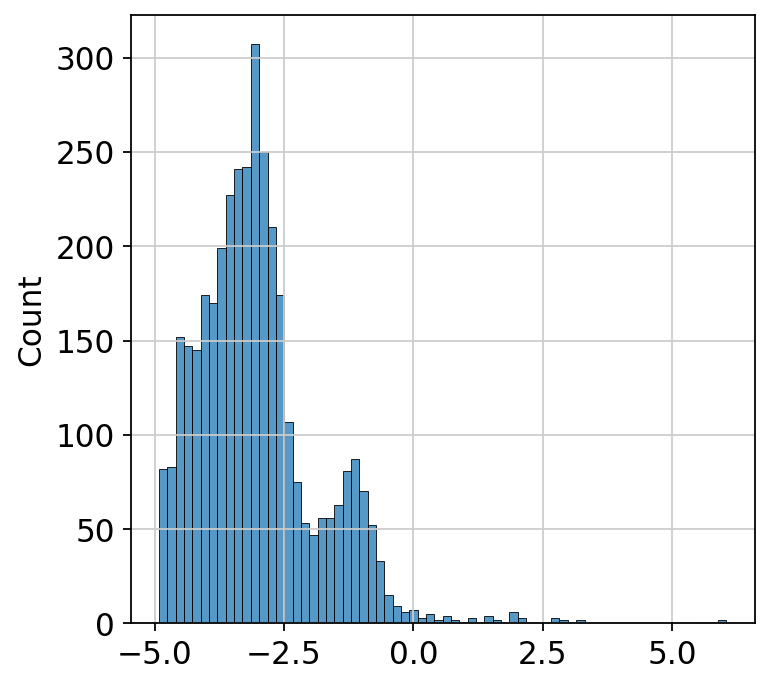

In [47]:
sn.histplot(ssc.obsm["X_umap"][:,0]) #-0.5 to 2.4

<AxesSubplot:ylabel='Count'>

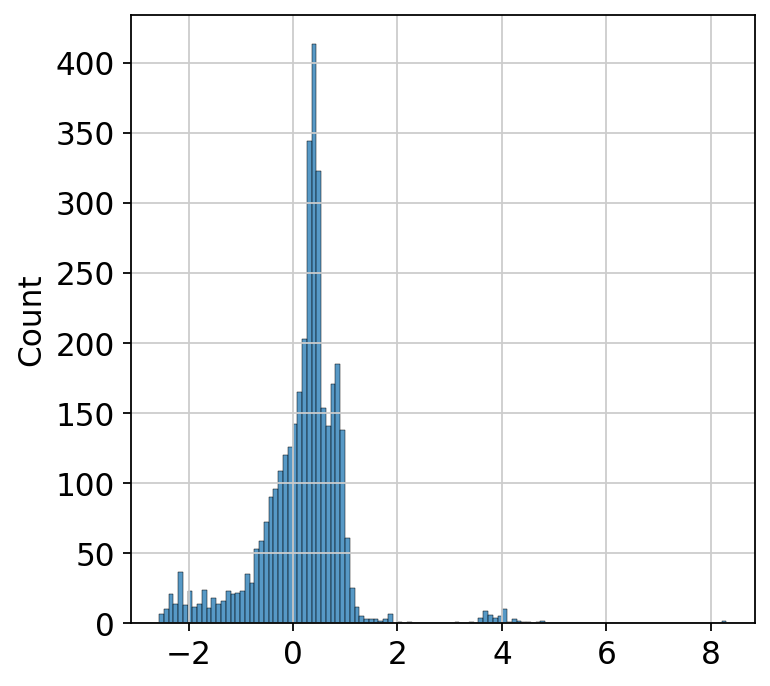

In [48]:
sn.histplot(ssc.obsm["X_umap"][:,1]) #-1 to 4.2

In [49]:
ssc2 = ssc[ssc.obsm["X_umap"][:,0] > -5]

ssc2 = ssc2[ssc2.obsm["X_umap"][:,0] < 3 ]
ssc2 = ssc2[ssc2.obsm["X_umap"][:,1] > -1]
ssc2 = ssc2[ssc2.obsm["X_umap"][:,1] < 4.2]

#### all target miRNA gene score UMAP overlay

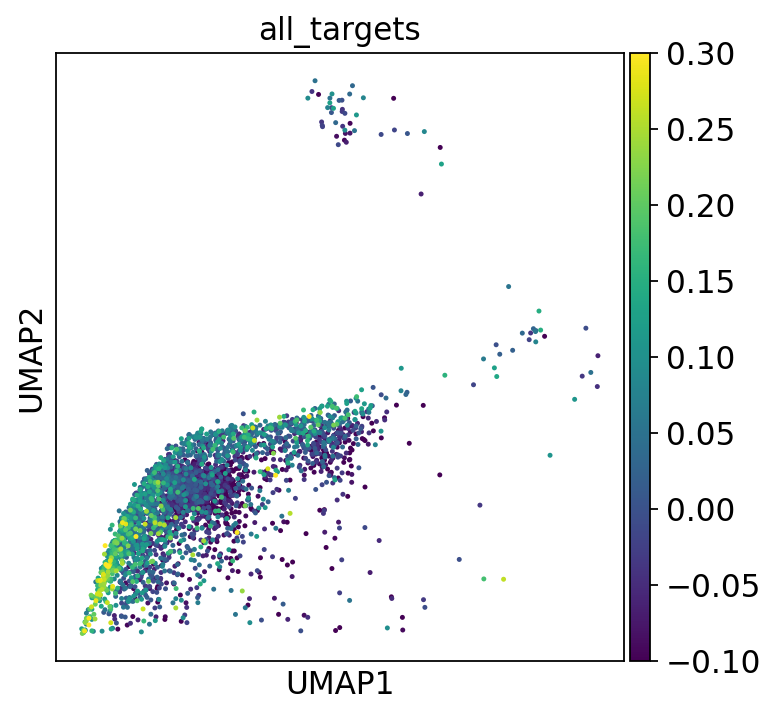

In [81]:
sc.set_figure_params(figsize=[5,5], format = 'pdf')
sc.pl.umap(ssc2, color = "all_targets", use_raw = False, vmin = -0.1, vmax = 0.3, s = 20, 
          save = "_SSC_all_target")

#### CSNK gene expression UMAP overlay

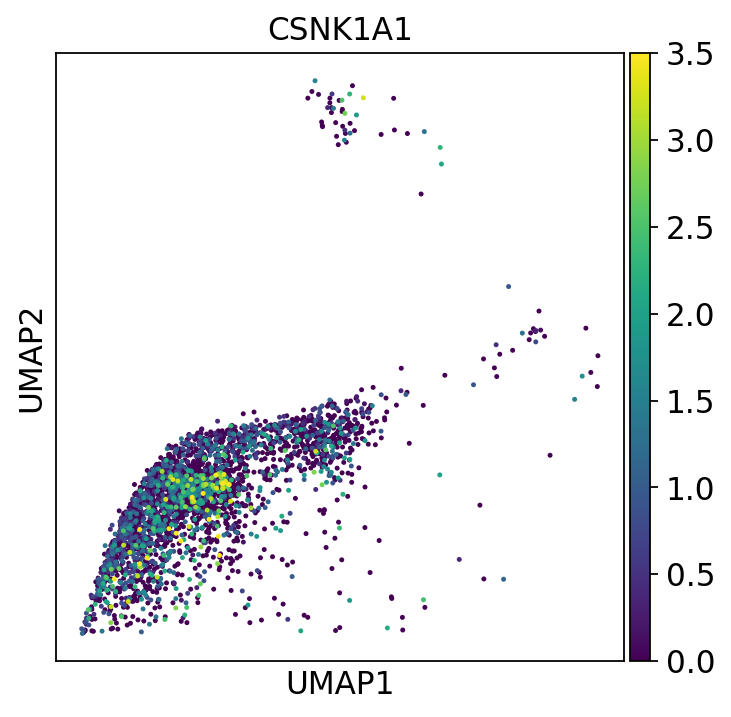

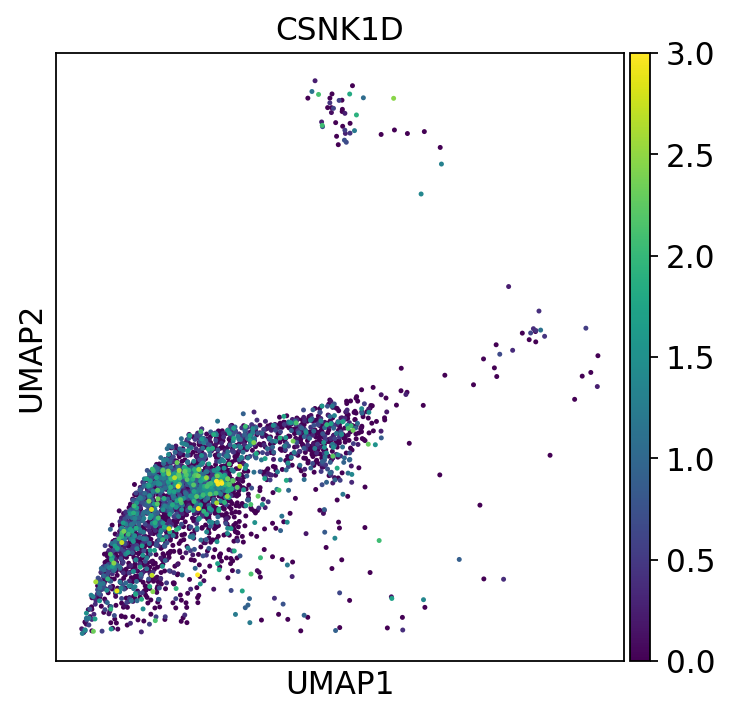

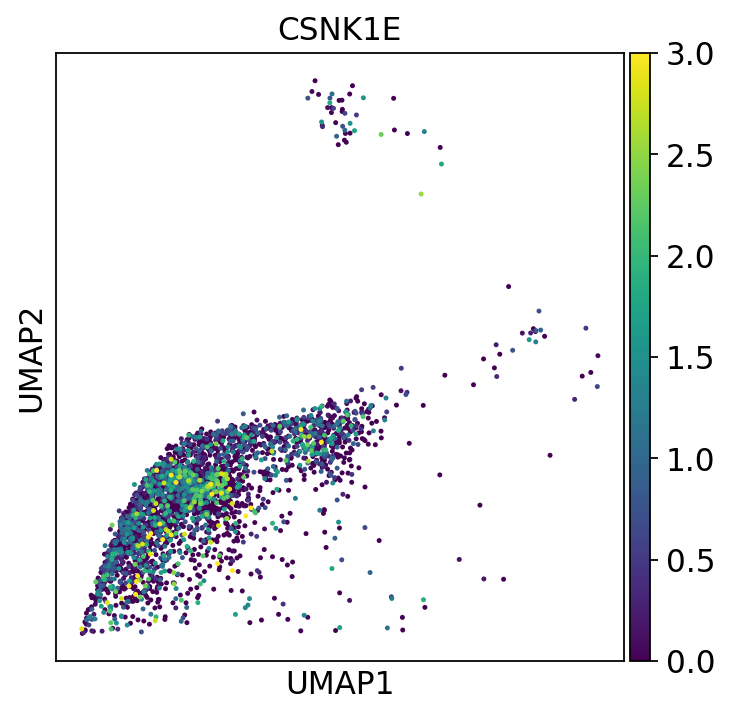

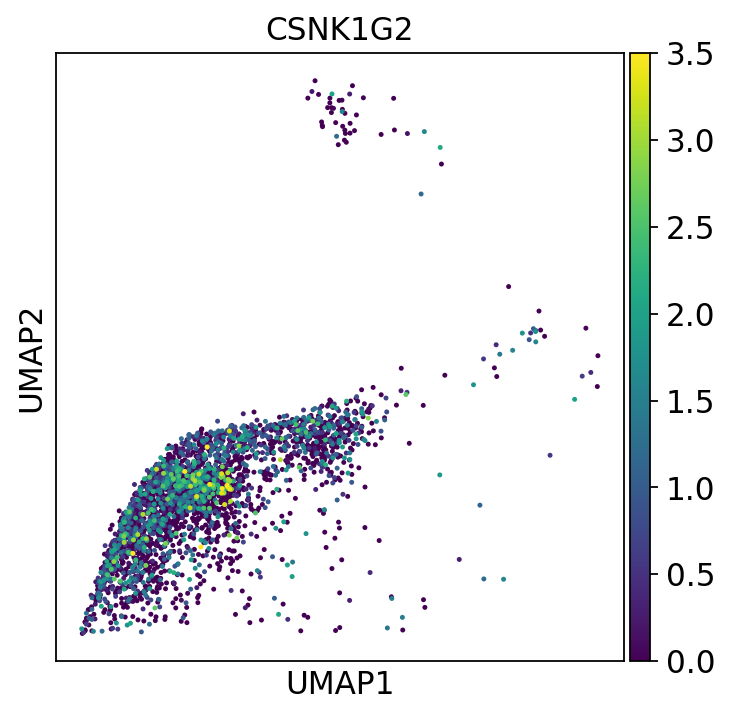

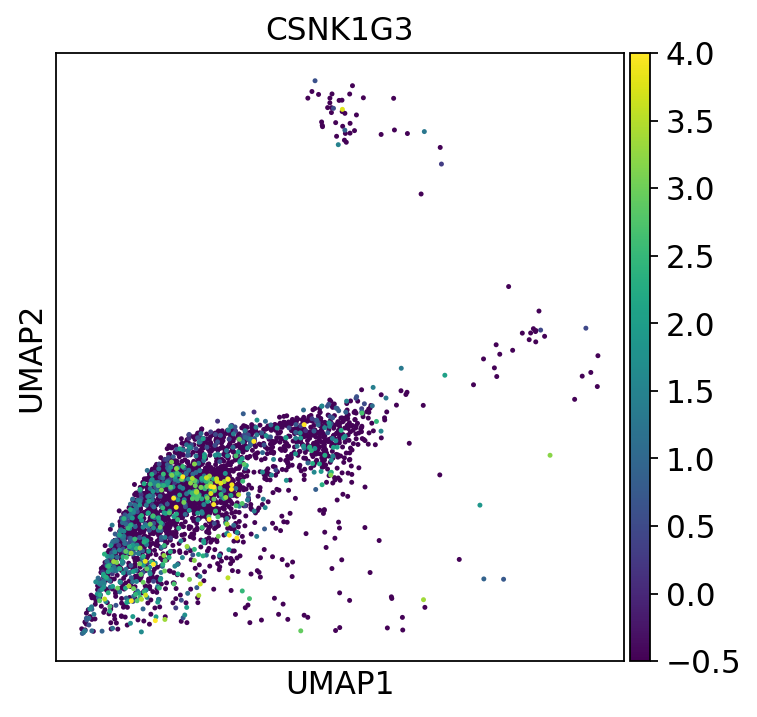

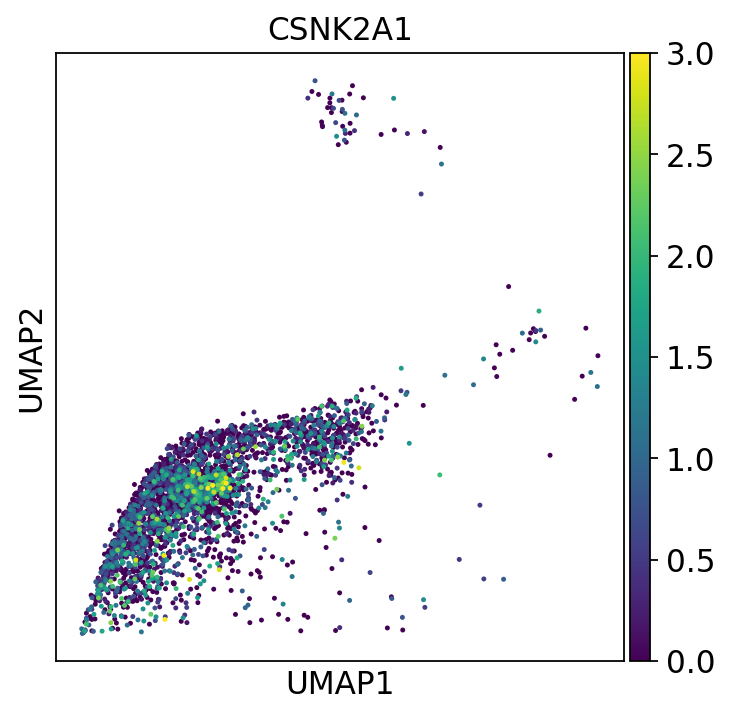

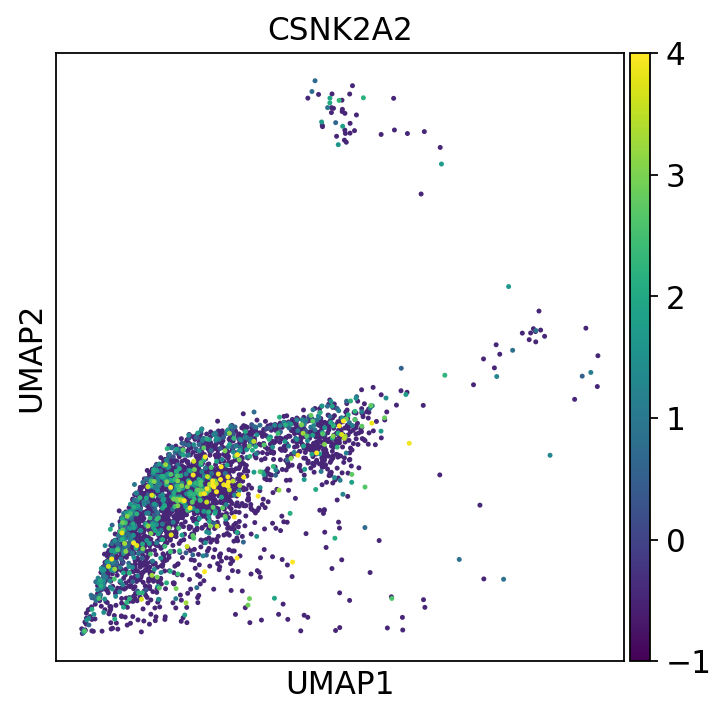

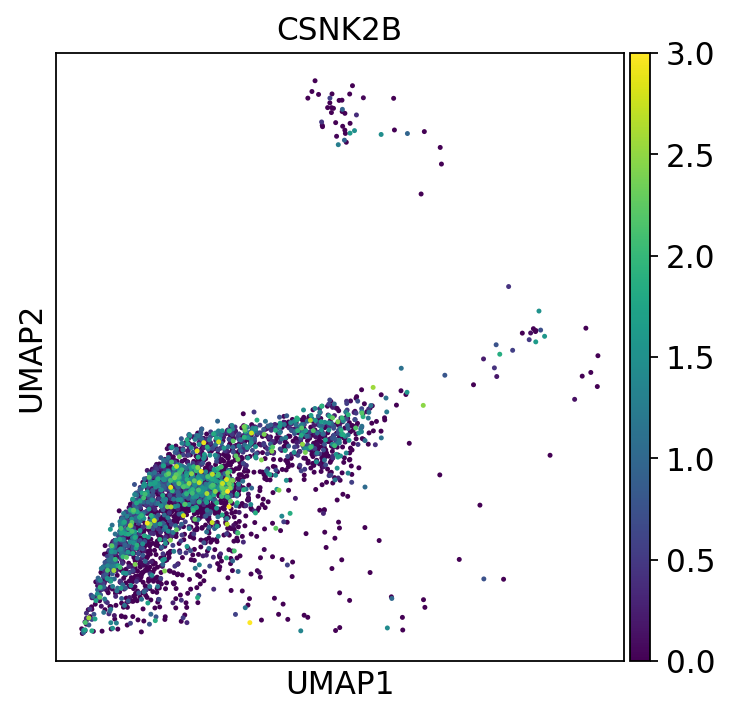

In [51]:
#      1.    2.  3.  4.     5    6.   7.    8
vmx = [3.5,  3,  3,  3.5,   4,   3,   4,    3]
vmn = [ 0 ,  0,  0,  0,  -0.5,  0,  -1,  0]
sc.set_figure_params(figsize = [5,5], format = 'pdf')
for i in range(len(csnks)):

    sc.pl.umap(ssc2, color = csnks[i] , use_raw= False ,
               vmax = vmx[i], vmin = vmn[i], s = 20, 
               save = "_SSC_" + csnks[i])
#

## GOB Analysis

In [7]:
gob.raw = gob
calc.normalization(gob)

AnnData object with n_obs × n_vars = 10829 × 35272
    obs: 'HTAN Parent Data File ID', 'HTAN Specimen ID', 'Cell_Type', 'Polyp_Type', 'Sample_Classification', 'Patient', 'KRAS_mutation', 'csnk1', 'csnk2', 'csnk_all', 'tp20_all_targets', 'tp50expr_targets_gene_scores', 'all_targets_gene_scores', 'top20pct_ck_all', 'top20pct_all_targets', 'top20pct_csnk1', 'top20pct_csnk2', 'top20pct_ck1a1', 'top20pct_ck2a1', 'top20pct_ck1d', 'top20pct_ck1e'
    var: 'mean', 'std'
    uns: 'Cell_Type_colors', 'KRAS_mutation_colors', 'Patient_colors', 'Polyp_Type_colors', 'Sample_Classification_colors', 'from_counts', 'pca', 'top20pct_all_targets_colors', 'top20pct_ck1a1_colors', 'top20pct_ck1d_colors', 'top20pct_ck1e_colors', 'top20pct_ck2a1_colors', 'top20pct_ck_all_colors', 'top20pct_csnk1_colors', 'top20pct_csnk2_colors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'from_counts_connectivities', 'from_counts_distances'

#### zoom in GOB

<AxesSubplot:ylabel='Count'>

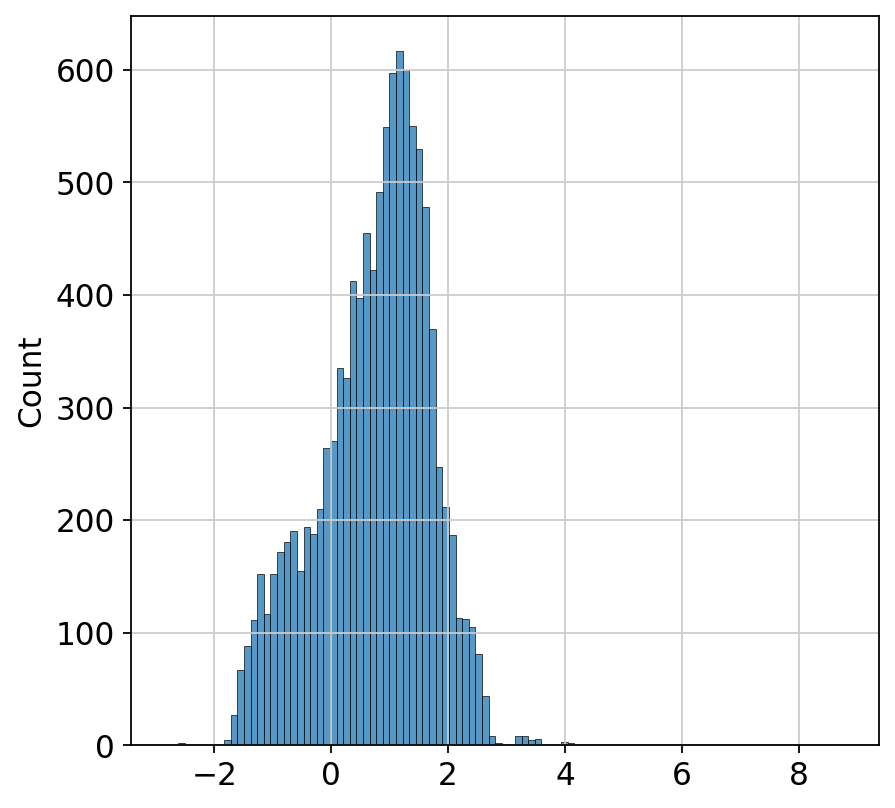

In [8]:
sn.histplot(gob.obsm["X_umap"][:,0]) # -0.2 to 3.75

<AxesSubplot:ylabel='Count'>

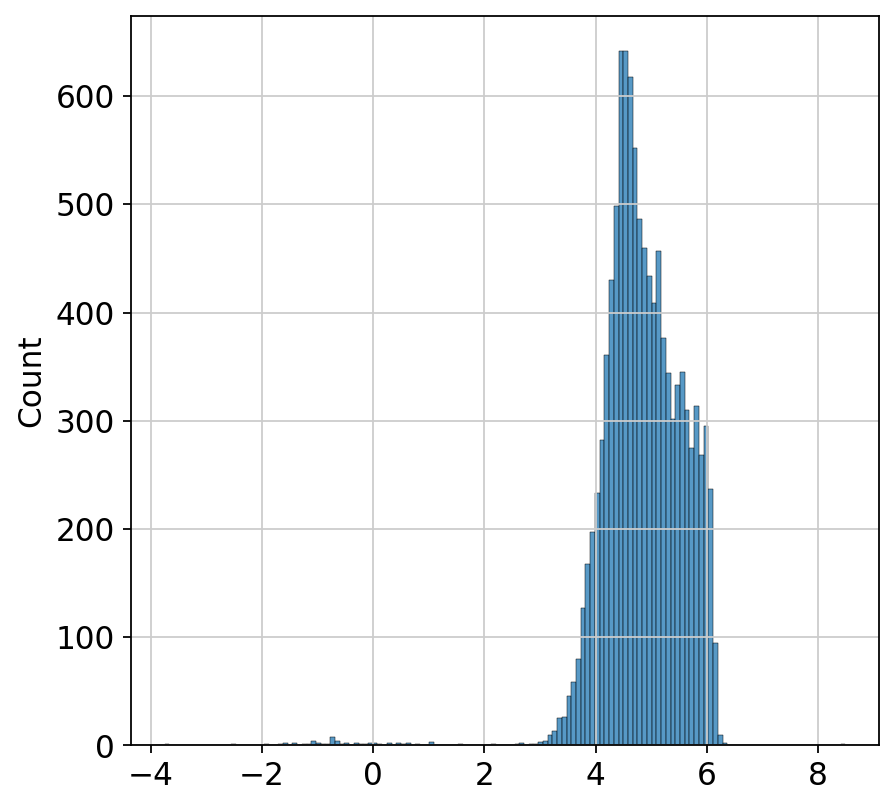

In [9]:
sn.histplot(gob.obsm["X_umap"][:,1]) #2.5 to 6.5

In [12]:
gob2 = gob[gob.obsm["X_umap"][:,0] > -2]
gob2 = gob2[gob2.obsm["X_umap"][:,0] < 7.5]
gob2 = gob2[gob2.obsm["X_umap"][:,1] > -2.5]
gob2 = gob2[gob2.obsm["X_umap"][:,1] < 8]

#### all miRNA target gene score UMAP overlay

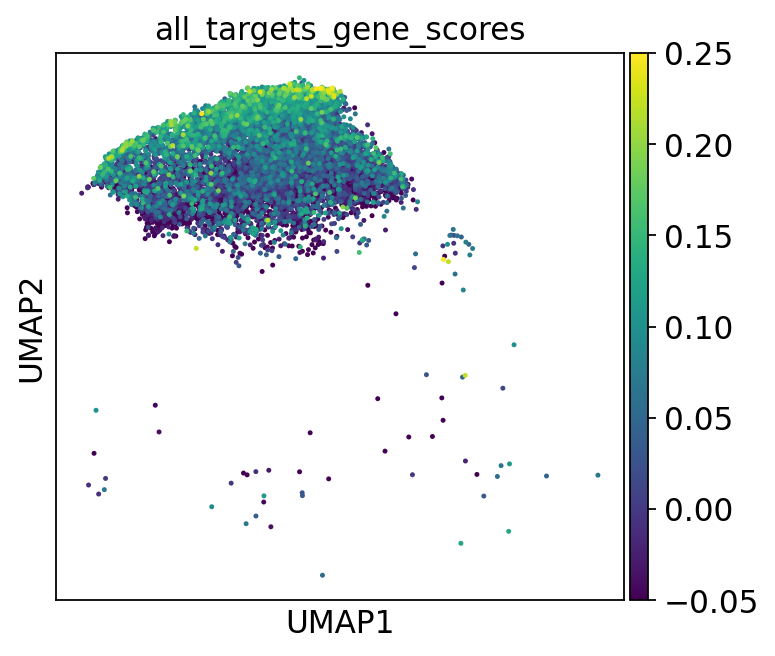

In [16]:
sc.set_figure_params(figsize = [5,4.5])
sc.pl.umap(gob2, color = 'all_targets', vmax = 0.25, vmin = -0.05, s = 20
          ,save = "_GOB_all_target")

#### CSNK gene expression UMAP overlay

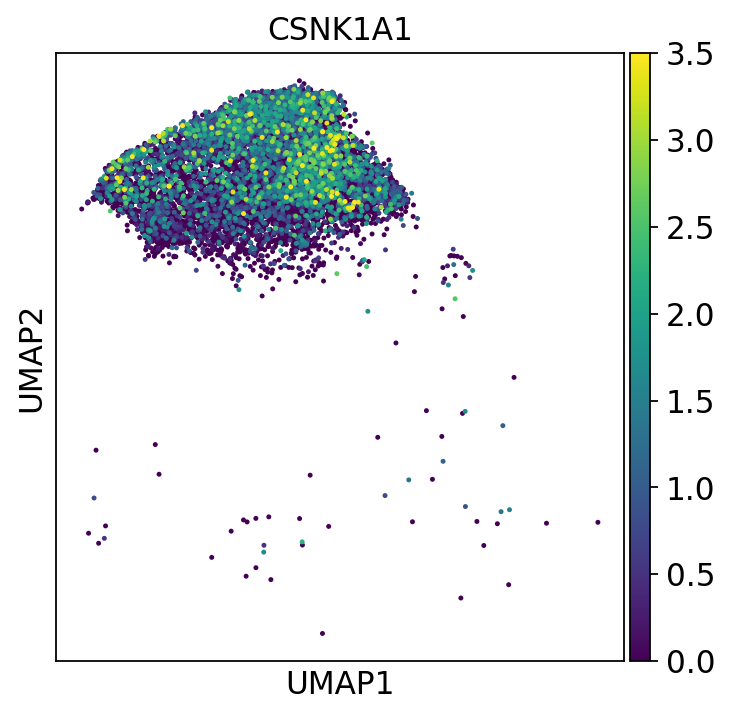

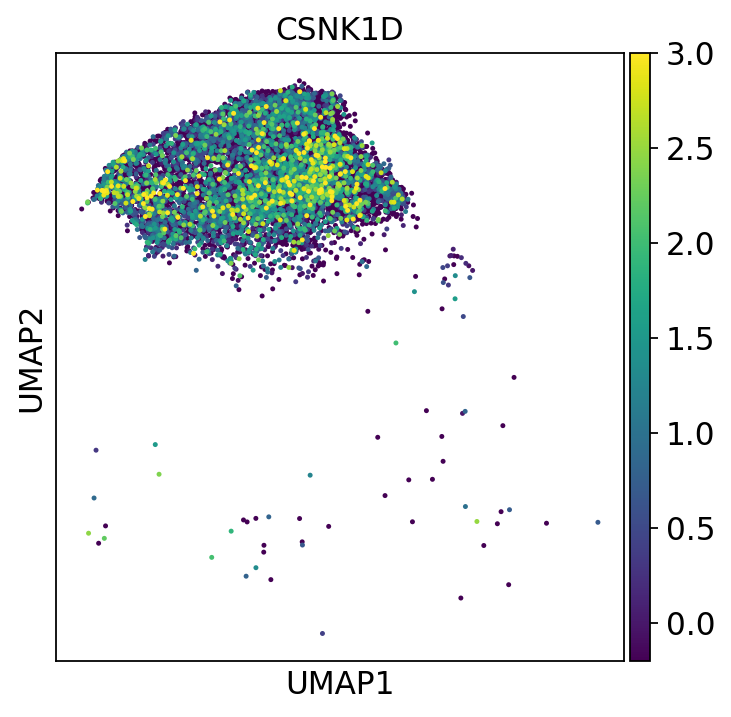

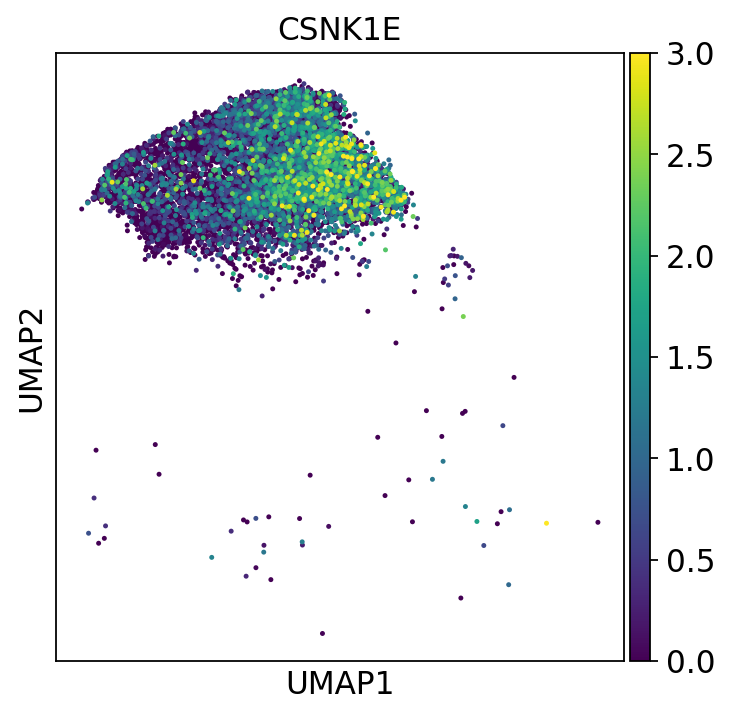

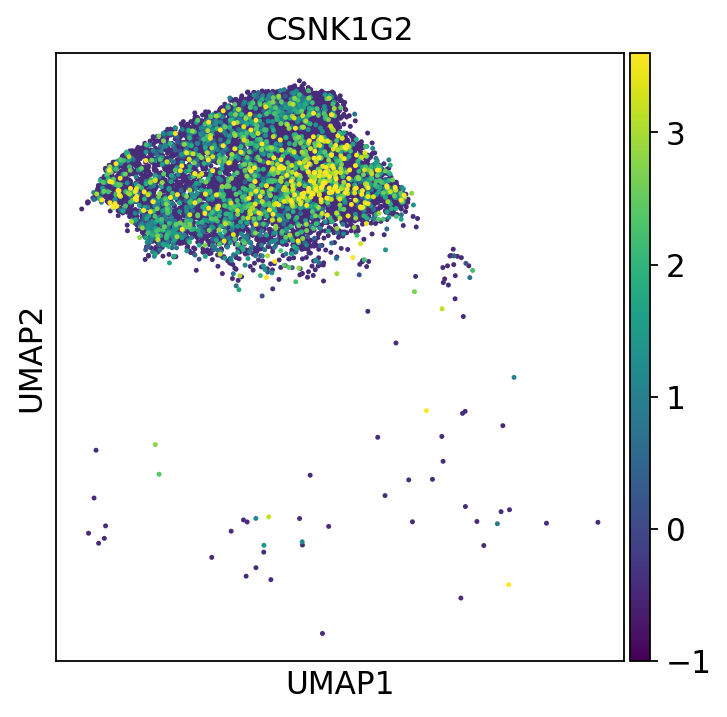

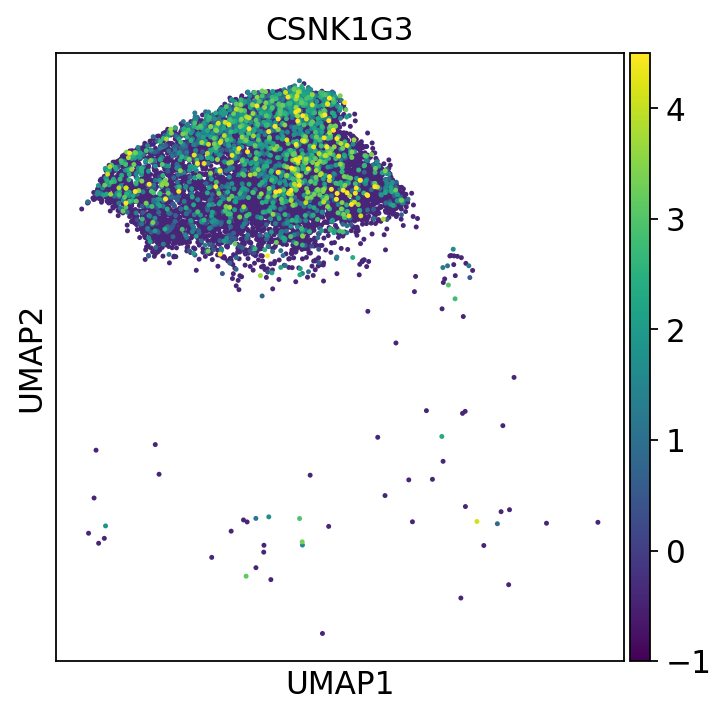

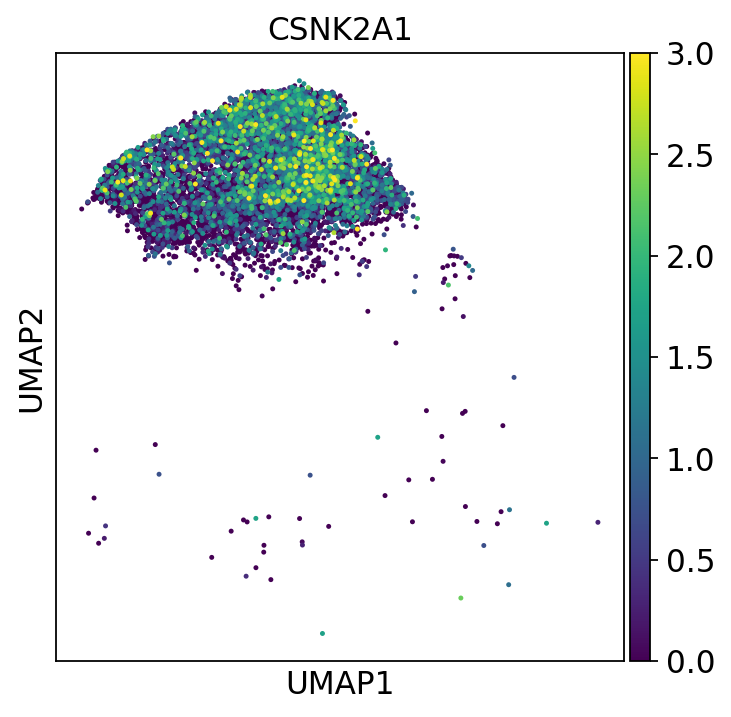

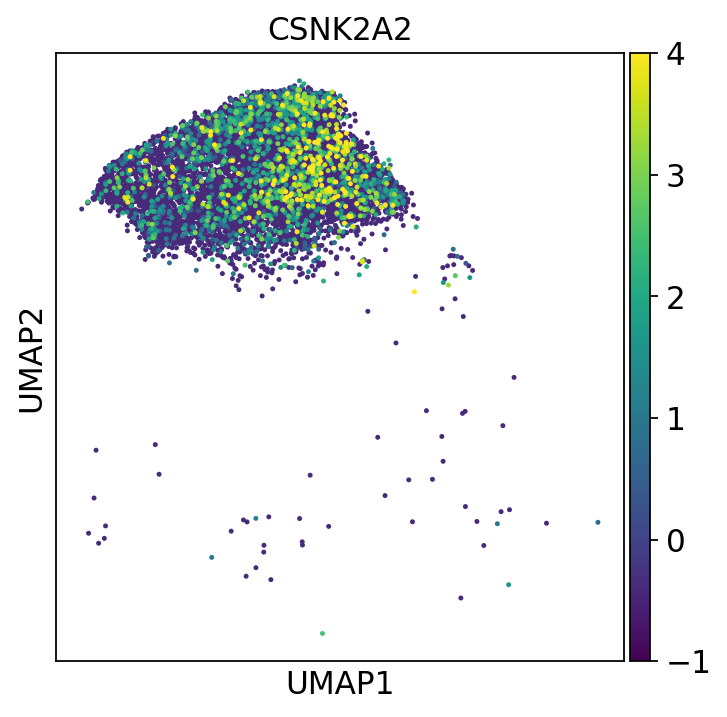

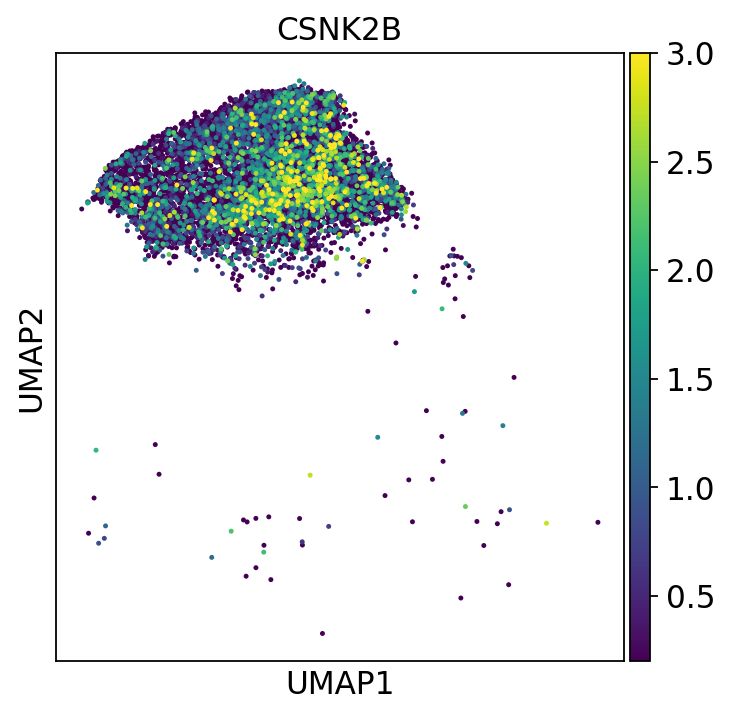

In [19]:
#      1.     2.   3.  4.     5    6.   7.    8
vmx = [3.5,   3,   3,  3.6,    4.5,   3,   4,    3]
vmn = [ 0,  -0.2, 0, -1,  -1,  0,  -1,  0.2]
sc.set_figure_params(figsize = [5,5], format = 'pdf')
for i in range(len(csnks)):

    sc.pl.umap(gob2, color = csnks[i] , use_raw= False ,
               vmax = vmx[i], vmin = vmn[i], s = 20, 
               save = "_GOB_" + csnks[i])
#

## Save files

In [20]:
#save only raw counts 

asc.X = asc.raw.X
ssc.X = ssc.raw.X
gob.X = gob.raw.X

In [22]:
calc.save_h5ad_compresseed([asc,ssc,gob], ["asc.h5ad", 'ssc.h5ad', 'gob.h5ad'])

3